In [2]:
import numpy as np
import matplotlib.pyplot as plt
from .. import camb
print(f"Using CAMB {camb.__version__} installed at {camb.__file__}")

ImportError: attempted relative import with no known parent package

In [2]:
base_cosmology = camb.set_params(# Background
	H0=70, ombh2=0.02238280, omch2=0.1201075, TCMB=2.7255,
	# Dark Energy
	dark_energy_model = 'MonodromicQuintessence',
	# Neutrinos
	omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
	nu_mass_degeneracies=[0], nu_mass_numbers = [0],
	# Initial Power Spectrum
	As = 2.100549e-09, ns = 0.9660499, 
	YHe = 0.246, WantTransfer=True
)

In [3]:
base_results = camb.get_results(base_cosmology)

: 

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']/scale_factor**4
_, w_de = base_results.get_dark_energy_rho_w(scale_factor)
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

: 

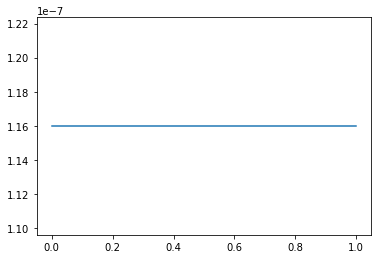

In [15]:
plt.plot(scale_factor, rho_de)